## imports

In [1]:
__author__ = 'ajshajib'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.table import Table

import seaborn as sns
from lenstronomy.LightModel.Profiles.shapelets import ShapeletSet
import lenstronomy.Util.util as util
import lenstronomy.Util.image_util as image_util

## load `FeatureEncoder` class

In [2]:
from feature_encoder import FeatureEncoder

feature_encoder = FeatureEncoder(pixel_size=0.05, image_width=100)

subtract_background = feature_encoder.subtract_background

## load data

In [3]:
shapelet_coeffs = np.load('../source_galaxy_shapelet_coefficients.npz')['arr_0']

In [23]:
loaded_file = np.load('./hla_images_galaxyzoo_galaxies_notodd>0.85.npz')

images = loaded_file['images']
good_iamge_indices = loaded_file['image_bool']
selected_galaxy_indices = np.loadtxt('selected_galaxy_indices.npy').astype(int)

all_image_indices = []

drop = [  26,   36,   41,   67,   68,   70,   92,   97,  122,  128,  176,
        179,  214,  219,  228,  242,  249,  268,  310,  330,  334,  390,
        412,  422,  430,  436,  473,  487,  497,  505,  523,  524,  537,
        552,  566,  568,  572,  589,  591,  627,  654,  659,  673,  674,
        683,  688,  691,  695,  697,  699,  706,  716,  717,  730,  745,
        757,  766,  768,  770,  783,  786,  790,  794,  795,  796,  797,
        799,  800,  801,  802,  805,  811,  817,  818,  823,  826,  829,
        841,  842,  845,  846,  847,  849,  852,  853,  854,  857,  859,
        860,  861,  862,  869,  875,  880,  883,  885,  888,  894,  898,
        902,  907,  912,  913,  915,  916,  920,  925,  927,  928,  938,
        941,  945,  958,  961,  964,  969,  971,  976,  981,  982,  985,
        989,  985, 1011, 1015, 1017, 1021, 1026, 1035, 1041, 1044, 1052,
       1060, 1063, 1067, 1071, 1074, 1075, 1085, 1098, 1113, 1116]

for i in selected_galaxy_indices:
    if i not in drop and good_iamge_indices[i] == 1:
            all_image_indices.append(i)

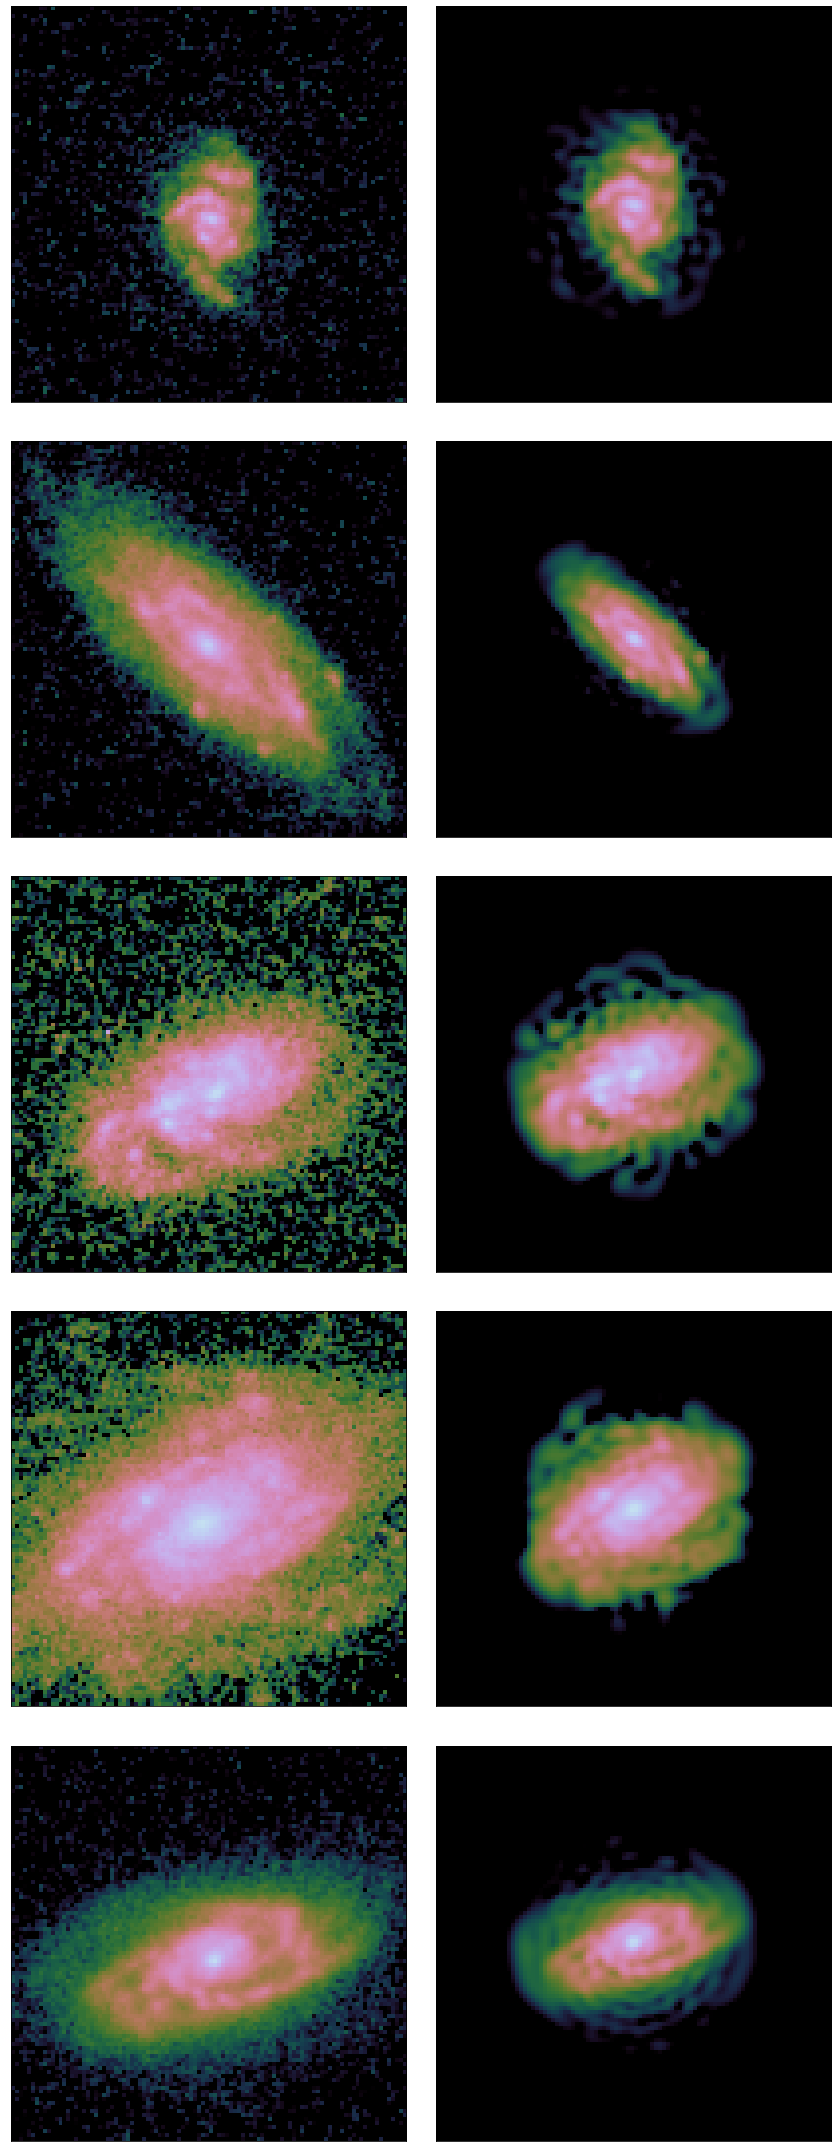

In [35]:
image_indices = [40, 30, 8, 15, 34] #, 21, 19, 25, 69, 2, 53, 78]

fig, axes = plt.subplots(nrows=len(image_indices), ncols=2, figsize=(12, 30))

for n, i in enumerate(image_indices): # range(len(shapelet_coeffs)):
    noise_subtracted_image = subtract_background(images[all_image_indices[i]])
    noise_subtracted_image[noise_subtracted_image<=0] = 1e-1
    
    #c_x, c_y = feature_encoder.get_offset_from_center(noise_subtracted_image, mask_radius=0.75)
    #xc, yc = feature_encoder.arcsec2pix(c_x, c_y)
    #print('center pixels:', xc, yc)
    
    axes[n][0].imshow(np.log10(noise_subtracted_image), origin='lower', 
               cmap='cubehelix', vmin=1, vmax=np.log10(noise_subtracted_image.max())+0.5)
    
    

    decoded_image = feature_encoder.decode_image(shapelet_coeffs[i], 30, beta=0.2, offset=(0, 0))
    decoded_image[decoded_image < 0.] = 1e-1
    #print(feature_encoder.get_offset_from_center(decoded_image))

    axes[n][1].imshow(np.log10(decoded_image), origin='lower', 
           cmap='cubehelix', vmin=1, vmax=np.log10(decoded_image.max())+0.5)
    
    for ax in [axes[n][0], axes[n][1]]:
        ax.set_xticks([])
        ax.set_yticks([])
        
    #plt.title('index: {}'.format(i))
    #plt.show()  
    

fig.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.02)

fig.savefig('/Users/ajshajib/Dropbox/Papers_Proposals/letc/figures/source_galaxies.pdf', bbox_inches='tight')